In [11]:
import pandas as pd

# source https://data.buenosaires.gob.ar/dataset/frecuencia-subte 
data = pd.read_csv("frecuencia_subte.csv")
data

,mes_anio;servicio_frecuencia_a;servicio_frecuencia_b;servicio_frecuencia_c;servicio_frecuencia_d;servicio_frecuencia_e;servicio_frecuencia_h;servicio_frecuencia_premetro;
0,2019-01;03:54;03:36;03:50;04:10;08:00;05:17;08...
1,2019-02;03:56;03:32;03:56;04:10;07:45;05:15;08...
2,2019-03;03:06;03:01;03:16;03:23;07:02;03:19;08...
3,2019-04;03:08;03:18;03:13;03:08;06:22;03:15;08...
4,2019-05;02:53;03:17;03:26;03:11;06:03;03:15;07...
...,...
65,2024-06;03:01;04:07;03:20;04:39;05:04;03:25;12...
66,2024-07;03:05;03:58;03:19;04:28;05:08;03:26;12...
67,2024-08;03:12;04:02;03:18;04:24;04:57;03:26;12...
68,2024-09;03:01;04:09;03:16;04:36;04:57;03:25;11...


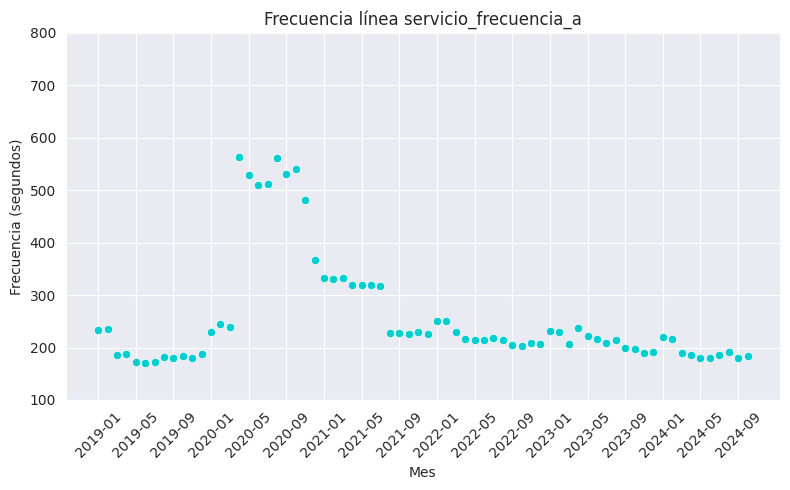

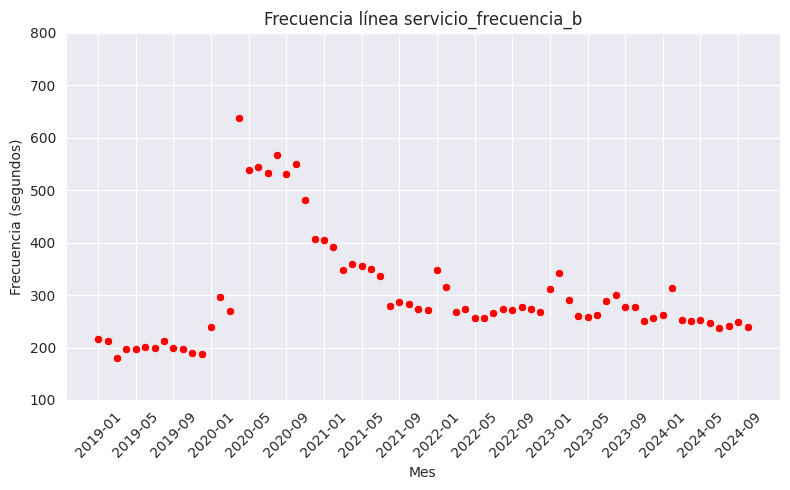

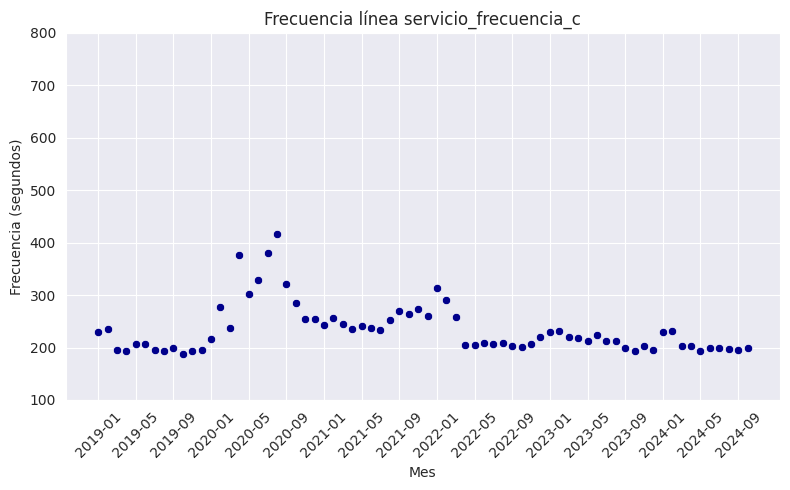

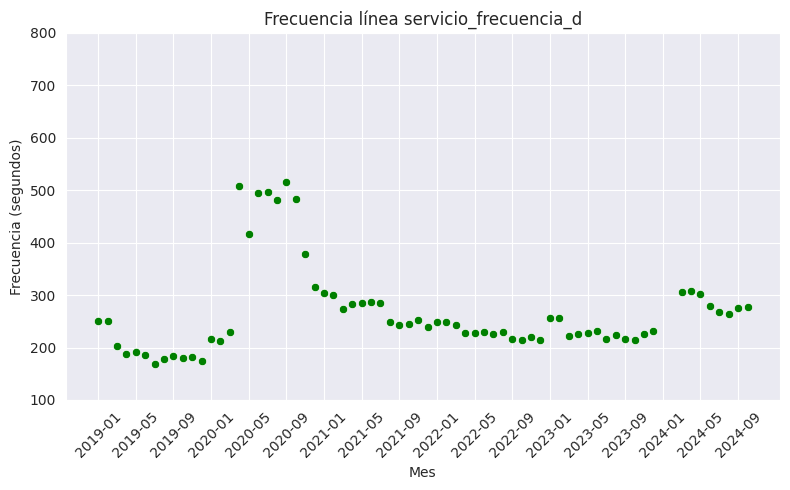

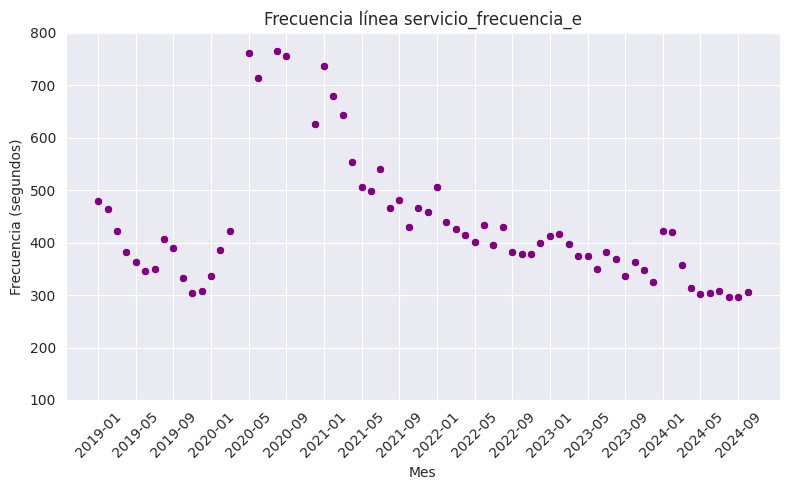

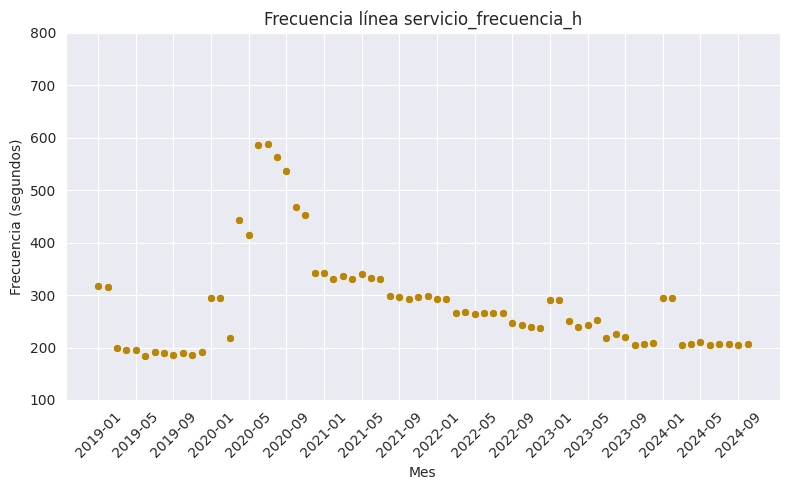

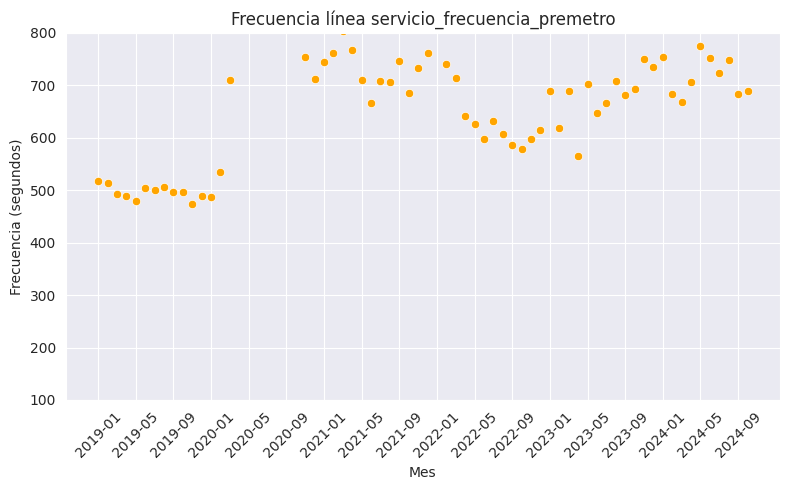

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el CSV
data = pd.read_csv("frecuencia_subte.csv", sep=';')
df = data
# Función para convertir formato hh:mm a minutos
def time_to_minutes(time_str):
    if time_str != time_str:
        return 0
    h, m = map(int, time_str.split(':'))
    return h * 60 + m

# Aplicar la conversión a todas las columnas de tiempo
for col in data.columns[1:]:
    data[col] = data[col].apply(time_to_minutes)

sns.set_style("darkgrid")

data

colors = {
    'servicio_frecuencia_a': 'darkturquoise',       # Línea A: Azul
    'servicio_frecuencia_b': 'red',        # Línea B: Rojo
    'servicio_frecuencia_c': 'darkblue',   # Línea C: Azul oscuro
    'servicio_frecuencia_d': 'green',      # Línea D: Verde
    'servicio_frecuencia_e': 'purple',     # Línea E: Púrpura
    'servicio_frecuencia_h': 'darkgoldenrod',       # Línea H: Amarillo
    'servicio_frecuencia_premetro': 'orange'  # Premetro: Celeste
}


for col in df.columns[1:]:
    plt.figure(figsize=(8, 5))
    
    # Usar seaborn para scatter plot
    sns.scatterplot(x=df['mes_anio'], y=df[col], color=colors[col])
    
    # Título y etiquetas
    plt.title(f'Frecuencia línea {col}')
    plt.ylabel('Frecuencia (segundos)')
    plt.xlabel('Mes')
    
    # Poner un label cada 6 meses en el eje X
    plt.xticks(ticks=range(0, len(df['mes_anio']), 4), labels=df['mes_anio'][::4], rotation=45)
    
    # Configurar el eje Y con intervalos de 1 minuto
    #plt.yticks(range(0, df[col].max() + 2, 1))
    # Agregar cuadriculado de fondo
    plt.grid(True)

    plt.tight_layout()
    plt.show()



### Graficamos

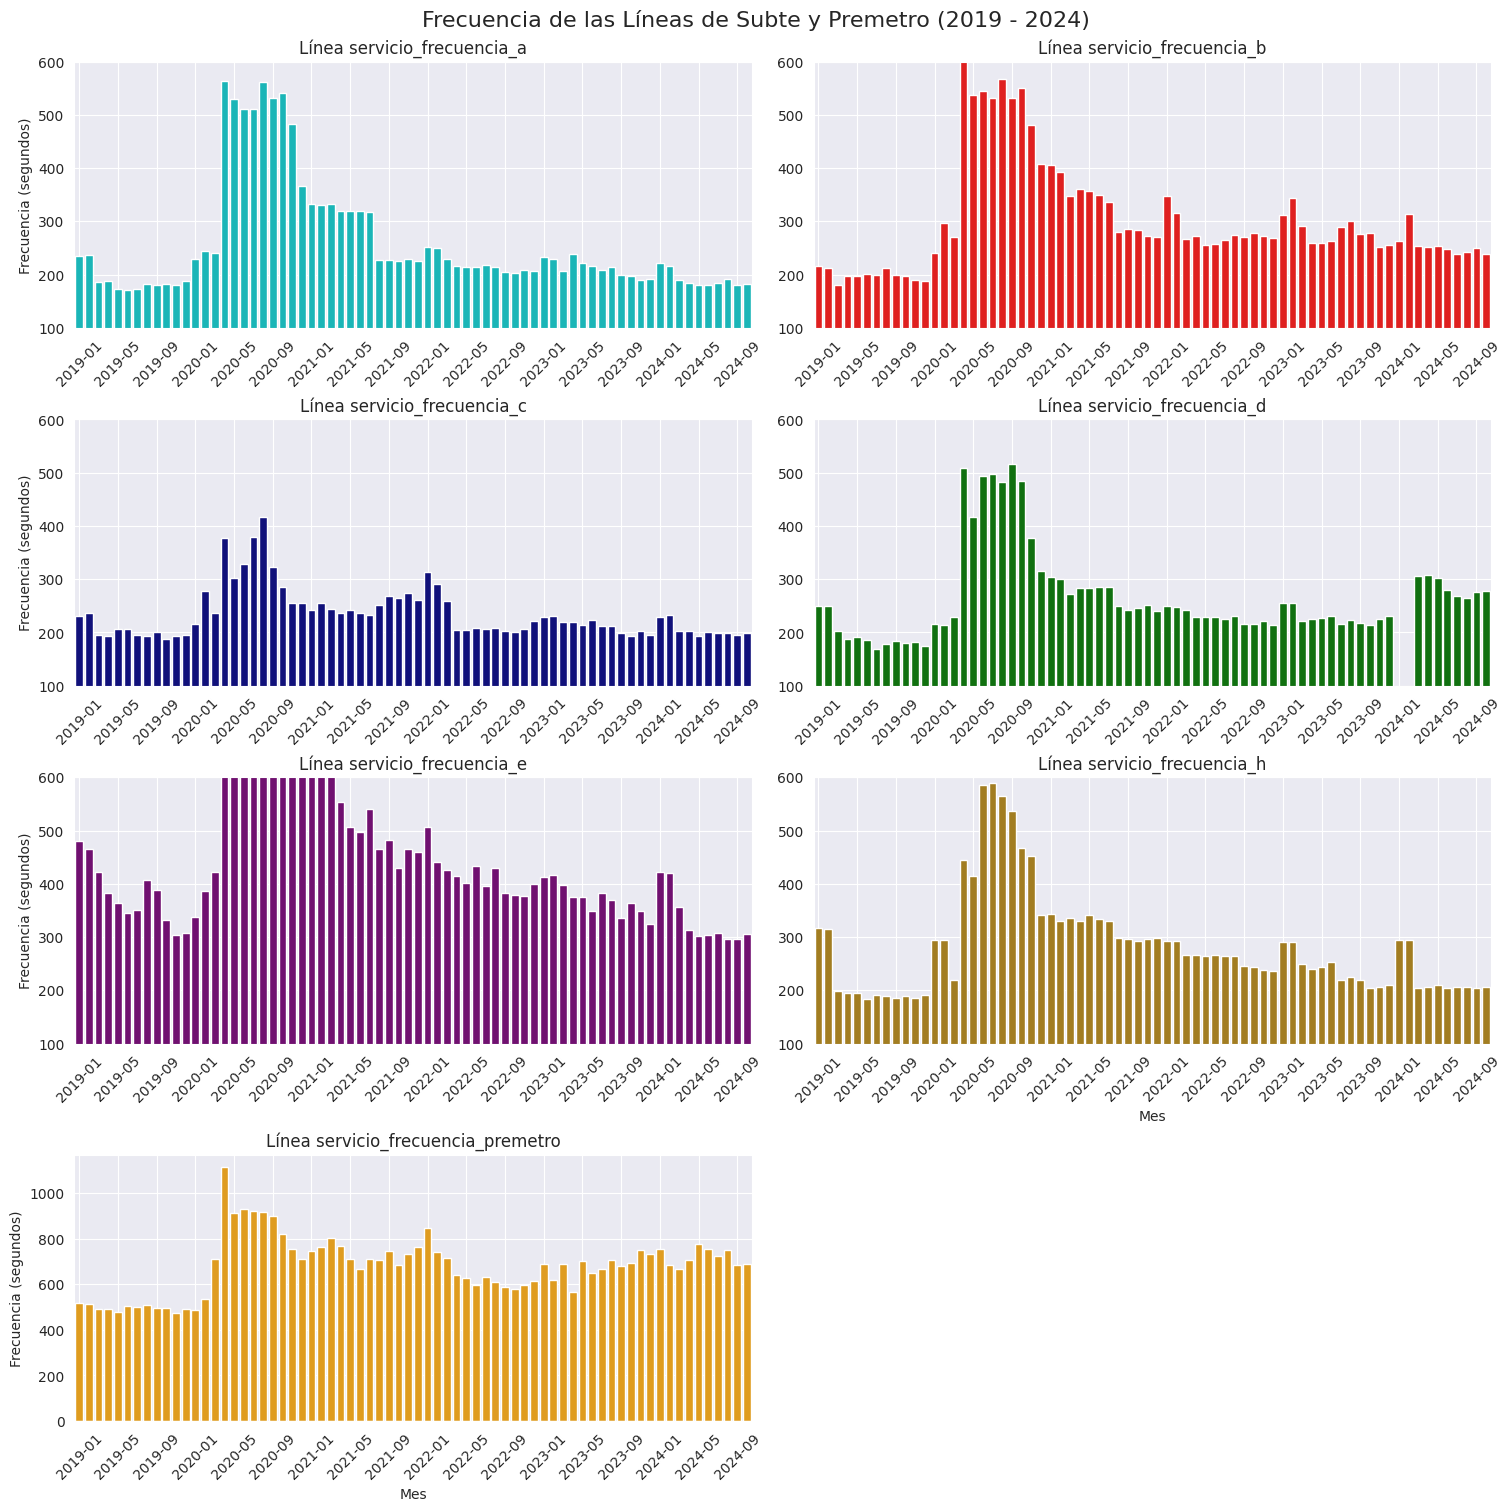

In [31]:
# Leer el CSV
data = pd.read_csv("frecuencia_subte.csv", sep=';')
df = data
# Función para convertir formato hh:mm a minutos
def time_to_minutes(time_str):
    if time_str != time_str:
        return 0
    h, m = map(int, time_str.split(':'))
    return h * 60 + m

# Aplicar la conversión a todas las columnas de tiempo
for col in data.columns[1:]:
    data[col] = data[col].apply(time_to_minutes)

sns.set_style("darkgrid")

# Crear subplots (4 filas, 2 columnas)
fig, axs = plt.subplots(4, 2, figsize=(15, 15), constrained_layout=True)

# Flatten la matriz de subplots para iterar fácilmente
axs = axs.flatten()

fig.suptitle('Frecuencia de las Líneas de Subte y Premetro (2019 - 2024)', fontsize=16)

colors = {
    'servicio_frecuencia_a': 'darkturquoise',       # Línea A: Azul
    'servicio_frecuencia_b': 'red',        # Línea B: Rojo
    'servicio_frecuencia_c': 'darkblue',   # Línea C: Azul oscuro
    'servicio_frecuencia_d': 'green',      # Línea D: Verde
    'servicio_frecuencia_e': 'purple',     # Línea E: Púrpura
    'servicio_frecuencia_h': 'darkgoldenrod',       # Línea H: Amarillo
    'servicio_frecuencia_premetro': 'orange'  # Premetro: Celeste
}

# Iterar sobre cada columna y hacer los subplots
for i, col in enumerate(df.columns[1:]):
    sns.barplot(ax=axs[i], x=df['mes_anio'], y=df[col], color=colors[col])
    
    # Título y etiquetas
    axs[i].set_title(f'Línea {col}')
    #axs[i].set_ylabel('Frecuencia (segundos)')
    #axs[i].set_xlabel('Mes')
    
    if i % 2 == 0:  # Primera columna (eje Y)
        axs[i].set_ylabel('Frecuencia (segundos)')
    else:
        axs[i].set_ylabel('') 

    if i >= 5:  # Última fila (eje X)
        axs[i].set_xlabel('Mes')
    else:
        axs[i].set_xlabel('')  # Borrar etiquetas del eje X en las filas superiores



    # Poner un label cada 4 meses en el eje X
    axs[i].set_xticks(range(0, len(df['mes_anio']), 4))
    axs[i].set_xticklabels(df['mes_anio'][::4], rotation=45)
    if i < 6:
        axs[i].set_ylim(100, 600)
    
    # Cuadriculado
    axs[i].grid(True)

# Eliminar el subplot vacío (último subplot)
for j in range(len(df.columns[1:]), 8):
    fig.delaxes(axs[j])

# Mostrar el gráfico general con los subplots
plt.savefig("frecuencia_subte.png")
plt.show()


TypeError: 'value' must be an instance of str or bytes, not a float

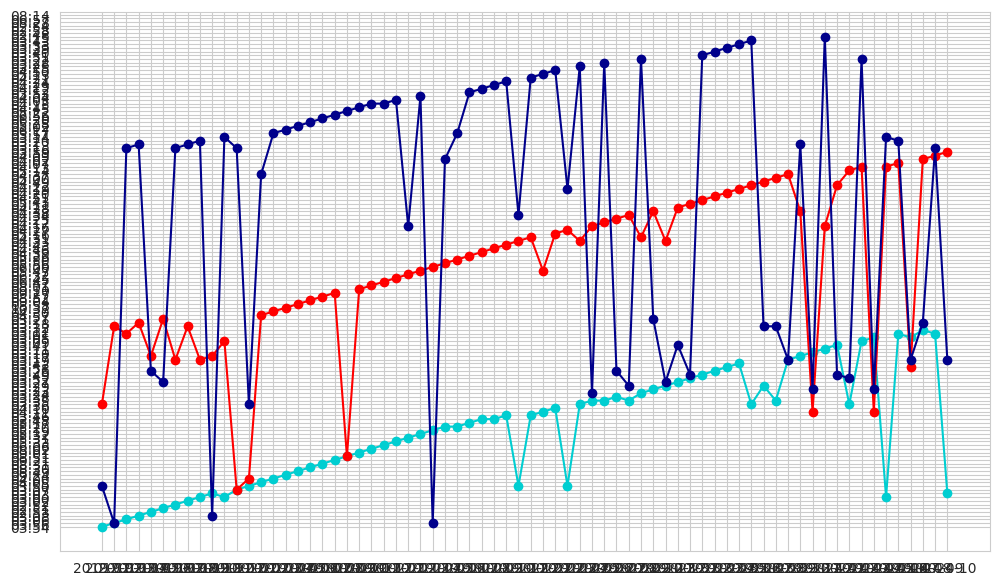

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el CSV
data = pd.read_csv("frecuencia_subte.csv", sep=';')

# Convertir mes_anio a tipo datetime
data['mes_anio'] = pd.to_datetime(data['mes_anio'], format='%Y-%m')

# Diccionario de colores para cada línea
colors = {
    'servicio_frecuencia_a': 'darkturquoise',
    'servicio_frecuencia_b': 'red',
    'servicio_frecuencia_c': 'darkblue',
    'servicio_frecuencia_d': 'green',
    'servicio_frecuencia_e': 'purple',
    'servicio_frecuencia_h': 'darkgoldenrod',
    'servicio_frecuencia_premetro': 'orange'
}

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 7))

# Agregar una línea para cada columna de frecuencia
for col in data.columns[1:]:
    plt.plot(data['mes_anio'], data[col], label=col.replace('servicio_frecuencia_', '').upper(), color=colors.get(col, 'gray'), marker='o')

# Configuración del gráfico
plt.title('Frecuencia de Líneas de Subte por Mes', fontsize=16)
plt.xlabel('Mes y Año', fontsize=12)
plt.ylabel('Frecuencia (minutos)', fontsize=12)
plt.xticks(ticks=data['mes_anio'][::4], labels=data['mes_anio'].dt.strftime('%Y-%m')[::4], rotation=45)
plt.legend(title="Líneas", fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



### Descargamos y limpiamos la data

In [23]:
import pandas as pd
import requests
from io import StringIO
import re

# URL del archivo CSV
url = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/frecuencia-subte/frecuencia_subte.csv"

# Descargar el contenido del CSV
response = requests.get(url)
response.raise_for_status()

# Convertir el contenido a una lista de líneas
lines = response.text.split('\n')

# Eliminar las primeras 7 líneas
lines = lines[7:]

# Añadir el nuevo encabezado
new_header = "Mes;A;B;C;D;E;H;PREMETRO"
lines.insert(0, new_header)

# Eliminar solo los puntos y comas al final de cada línea
lines = [re.sub(r';+$', '', line.rstrip()) for line in lines]

# Unir las líneas de nuevo en un solo string
csv_content = '\n'.join(lines)

# Leer el contenido modificado en un DataFrame de pandas
df = pd.read_csv(StringIO(csv_content), sep=';')


df["D"].fillna("00:00", inplace = True)

# Mostrar las primeras filas del DataFrame
print(df.head())

# Información básica sobre el DataFrame
print(df.info())

# Guardar el DataFrame modificado en un archivo CSV local
df.to_csv('frecuencia_subte_modificado.csv', index=False, sep=';')
print("El archivo CSV modificado ha sido guardado localmente como 'frecuencia_subte_modificado.csv'")

# Imprimir las primeras líneas del contenido modificado para verificación
print("\nPrimeras líneas del contenido modificado:")
print('\n'.join(lines[:5]))

     Mes      A      B      C      D      E      H PREMETRO
0  ene19  03:54  03:36  03:50  04:10  08:00  05:17    08:38
1  feb19  03:56  03:32  03:56  04:10  07:45  05:15    08:33
2  mar19  03:06  03:01  03:16  03:23  07:02  03:19    08:13
3  abr19  03:08  03:18  03:13  03:08  06:22  03:15    08:09
4  may19  02:53  03:17  03:26  03:11  06:03  03:15    07:59
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Mes       65 non-null     object
 1   A         65 non-null     object
 2   B         65 non-null     object
 3   C         65 non-null     object
 4   D         65 non-null     object
 5   E         65 non-null     object
 6   H         65 non-null     object
 7   PREMETRO  65 non-null     object
dtypes: object(8)
memory usage: 4.2+ KB
None
El archivo CSV modificado ha sido guardado localmente como 'frecuencia_subte_modificado.csv'

Primeras líneas del

/tmp/ipykernel_1396776/2352768468.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["D"].fillna("00:00", inplace = True)
